# Assess clustering quality using Silhouette coefficient

In [1]:
# Given a clustering:
# 1. Calculate cluster cohesion as the avg distance between 
#    an exampe x and all the other points in the same cluster.
# 2. Calculate cluster separation from the next closest cluster
#    as the avg distance between the example x and all examples
#    in the nearest cluster.
# 3. Calculate the silhouette coeff as the difference between 
#    cluster cohesion and separation divided by the grater of the two.

%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


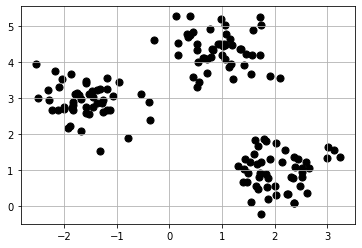

In [2]:
X,y = make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.5,
                shuffle=True,
                random_state=0)

plt.scatter(X[:,0],X[:,1],c='black',marker='o',s=50)
plt.grid()
plt.show()


In [3]:
# Apply K-means clustering

km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)


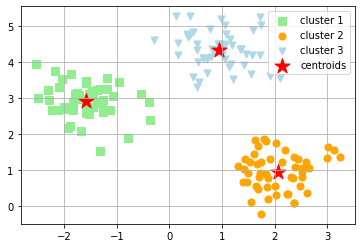

In [4]:
# Plot the result of K-means clustering

plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

Silhouette Score: 0.7143417887288687


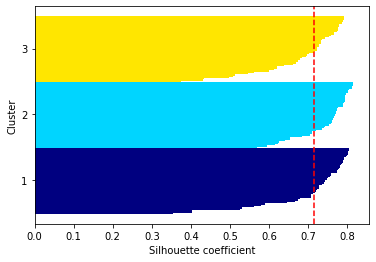

In [18]:
# Calculate Silhouette score
from sklearn.metrics import silhouette_score

# Get the cluster labels and the silhouette values for all data points
cluster_labels = np.unique(y_km)                         # [0, 1, 2]
n_clusters = cluster_labels.shape[0]                     # 3
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# For each cluster, get the silhoutte scores of the data points that belong to the cluster
# Sort them 
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    # The lines below are for the bar chart (to set y axis height, colors, etc)
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

# This is the avg. (that can also be computer directly via sklearn)
silhouette_avg = np.mean(silhouette_vals)
# Or calculate the avg. silhouette score directly via the silhouette_score function of sklearn
print(f'Silhouette Score: {silhouette_score(X, y_km)}')

# Draw the chart
plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()


In [19]:
# The avg value is >0.7 as shown in the plot above.
# The majority of the points have values around 0.7 
# This seems to be a relatively good clustering.

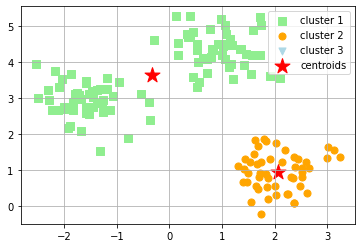

In [20]:
# Let's see an example of a worse clustering using the same data.

# Set number of cluster = 2
km = KMeans(n_clusters = 2, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

# Plot
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.5848706144251782


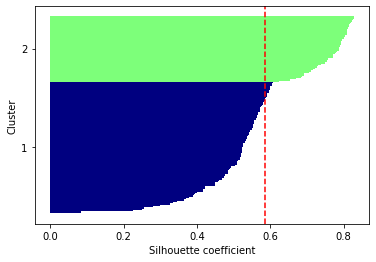

In [21]:
# Same code as in the previous example

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
print(f'Silhouette Score: {silhouette_score(X, y_km)}')

plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()


In [22]:
# The silhouettes have now different lengths and widths which is an evidence
# of suboptimal clustering.
# Moreover the silhouette score has dropped to 0.58